# Percobaan 3

Nama : Muhammad Fadhil Syahputra

NIM : 2211014210002

In [85]:
import numpy as np 
import matplotlib.pyplot as plt
import itertools as it
import librosa as lr
import IPython.display as ipd

In [6]:
everforestColors = [
    "#FF6F61", # red
    "#6F61FF", # blue
    "#61FF6F", # green
    "#FF61F0", # magenta
    "#61F0FF", # cyan
    "#F0FF61", # yellow
]

colors = it.cycle(everforestColors)

## 3.4.1 Discrete / Fast Fourier Transform

### 3.4.1.1 Dasar Pembentukan DFT

Bangkitkan sinyal sinus x(t) = 3 cos (2πt), pada t = nT. Untuk suatu n = 0 – 99, dan T =
0,01. Tampilkan sinyalnya dalam bentuk sinus kontinyu dan sinus diskrit.

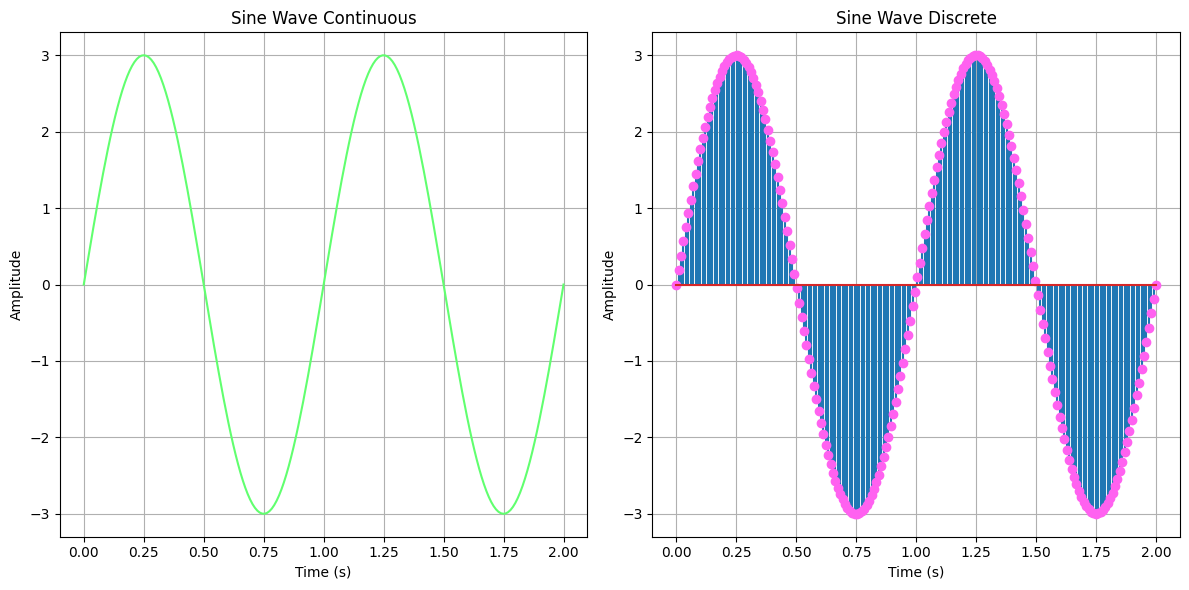

In [18]:
T = 0.01

n = np.linspace(0, 200, 200)
t=n*T
x=3*np.sin(2*np.pi*t)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(t, x, color = next(colors))
ax[0].set_title('Sine Wave Continuous')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
stemlines, markerlines, baselines = ax[1].stem(t, x)
stemlines.set_color(next(colors))
ax[1].set_title('Sine Wave Discrete')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[0].grid()
plt.tight_layout()
plt.show()


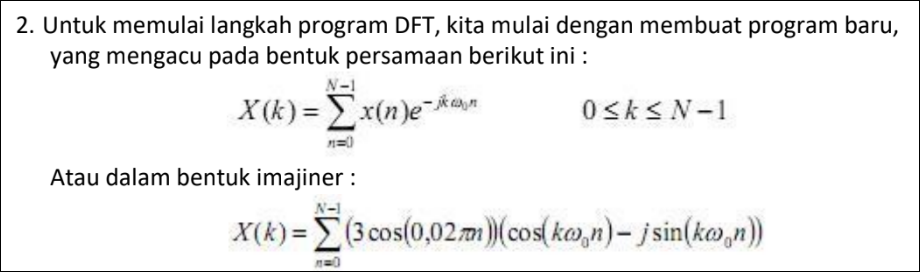

In [71]:
def dft(x: list) -> tuple:
    yreals = []
    yimags = []
    ymags = []
    N = len(x)
    for k in range(N):
        xn = 0
        for n in range(N):
            xn += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
        yreal = np.real(xn)
        yimag = np.imag(xn)
        ymag = np.sqrt(yreal**2 + yimag**2)
        yreals.append(yreal)
        yimags.append(yimag)
        ymags.append(ymag)
    return np.array(yreals), np.array(yimags), np.array(ymags)


def plot_dft(x: list, suptitle: str) -> None:
    sample = f"Sampled Points: {len(x)}"
    fig, ax = plt.subplots(1, 3, figsize=(12, 6))
    fig.suptitle(f'{suptitle} - DFT', fontsize=16)
    yreals, yimags, ymags = dft(x)
    ax[0].plot(np.linspace(0, len(yreals), len(yreals)), yreals, color = next(colors))
    ax[0].set_title('Real Part of DFT')
    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('Amplitude')
    ax[1].plot(np.linspace(0, len(yimags), len(yimags)), yimags, color = next(colors))
    ax[1].set_title('Imaginary Part of DFT')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[2].plot(np.linspace(0, len(ymags), len(ymags)), ymags, color = next(colors))
    ax[2].set_title('Magnitude of DFT')
    ax[2].set_xlabel('Frequency (Hz)')
    ax[2].set_ylabel('Amplitude')
    ax[2].grid()
    ax[0].grid()
    ax[1].grid()
    fig.legend([sample], loc='upper right', fontsize=12, frameon=True)
    plt.tight_layout()
    plt.show()


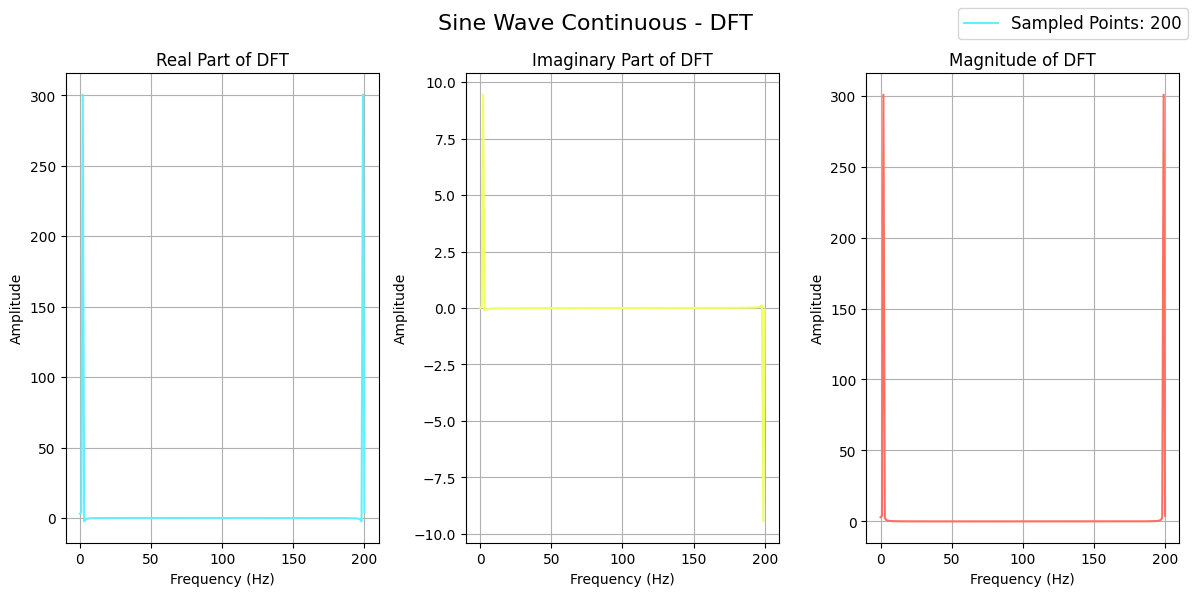

In [72]:
plot_dft(x, 'Sine Wave Continuous')

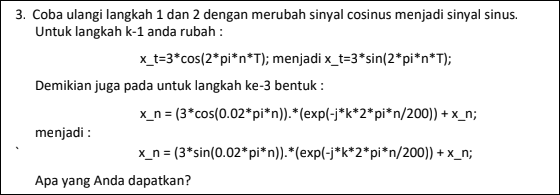

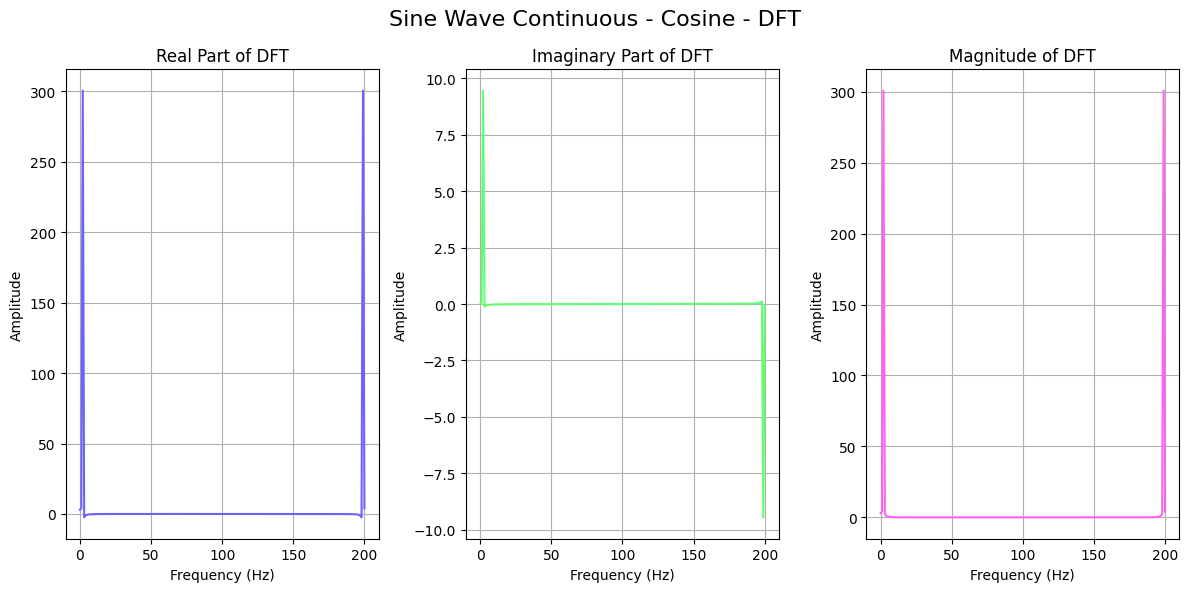

In [59]:
x = 3*np.cos(2*np.pi*t)
plot_dft(x, 'Sine Wave Continuous - Cosine')

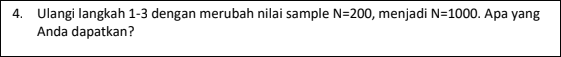

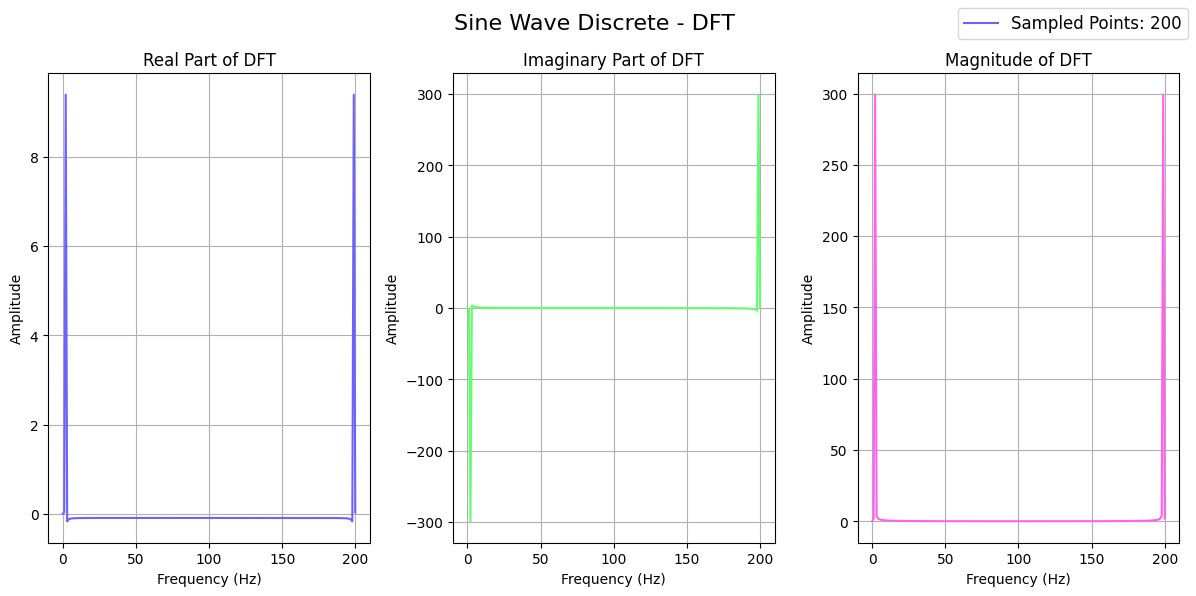

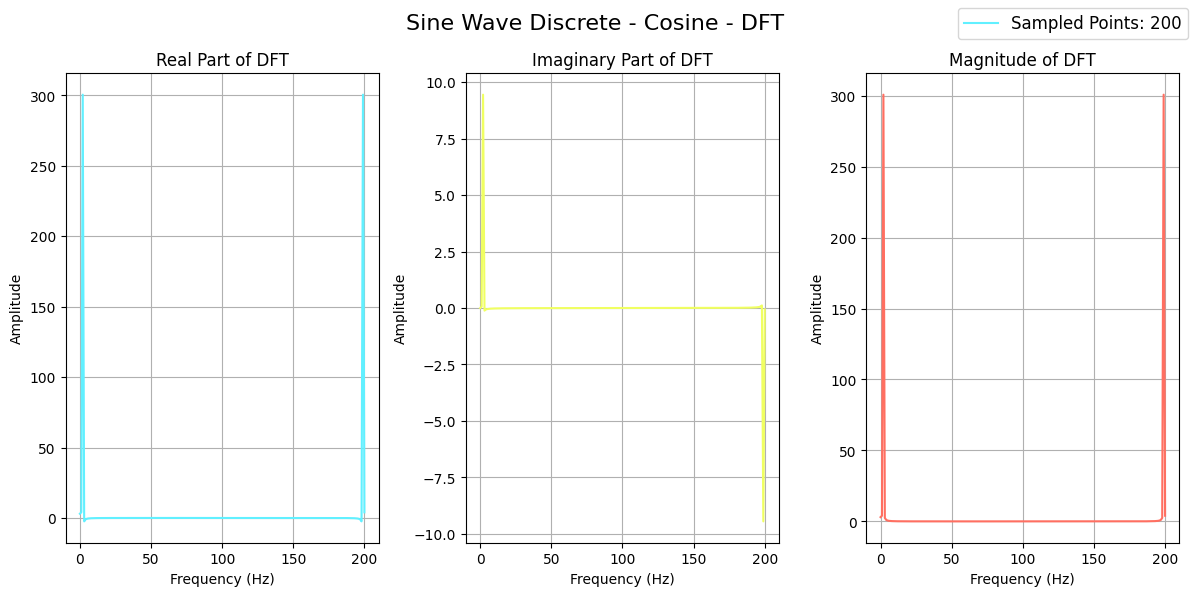

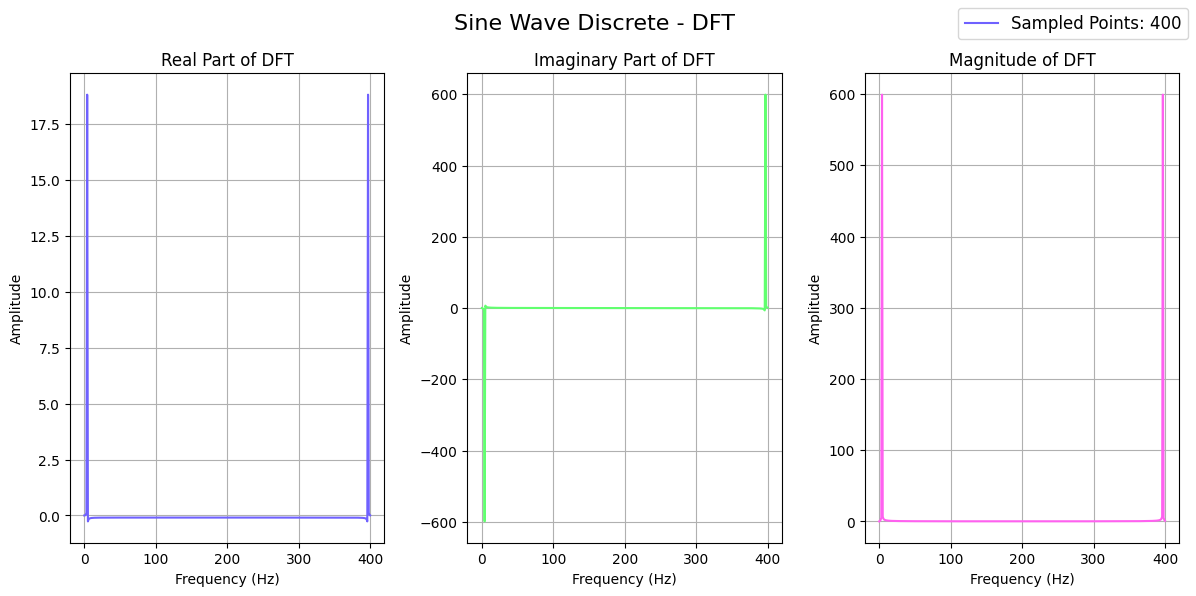

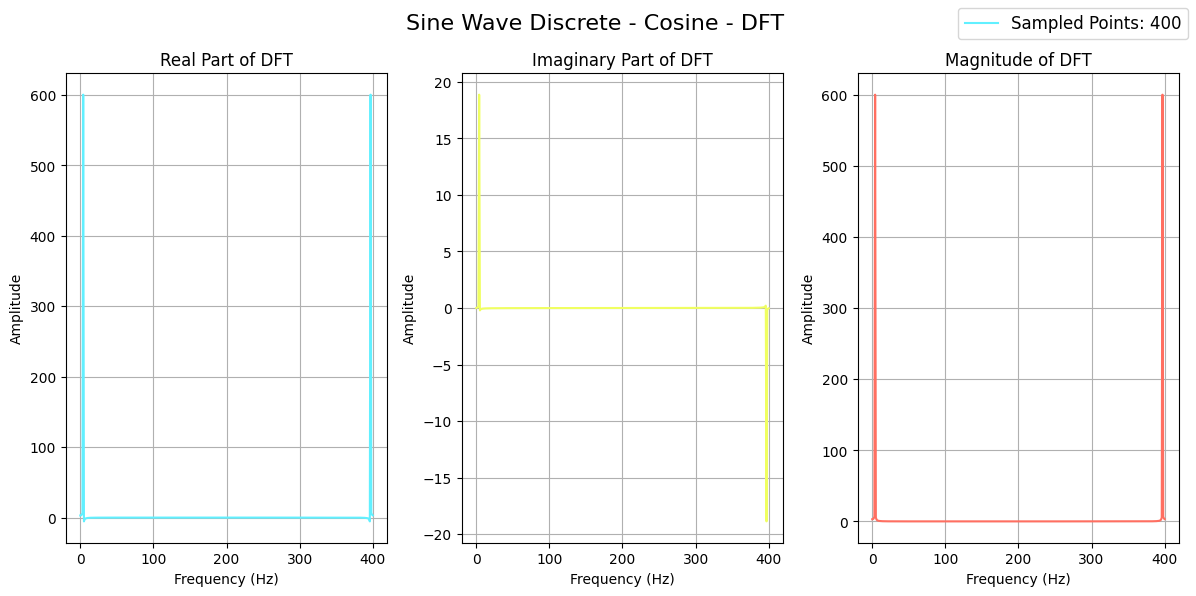

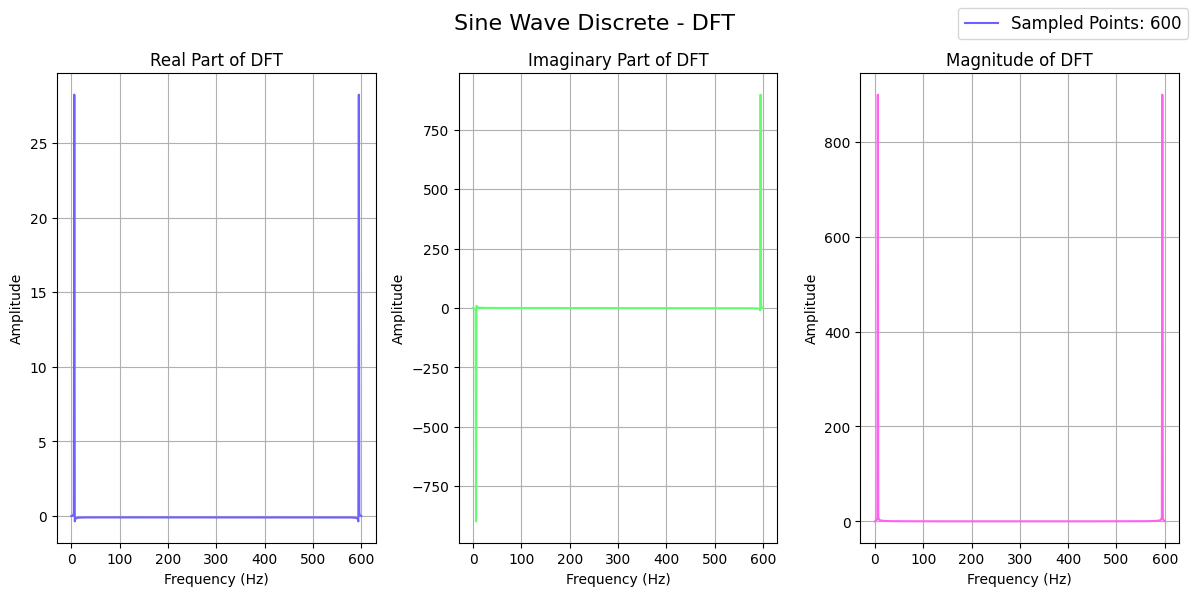

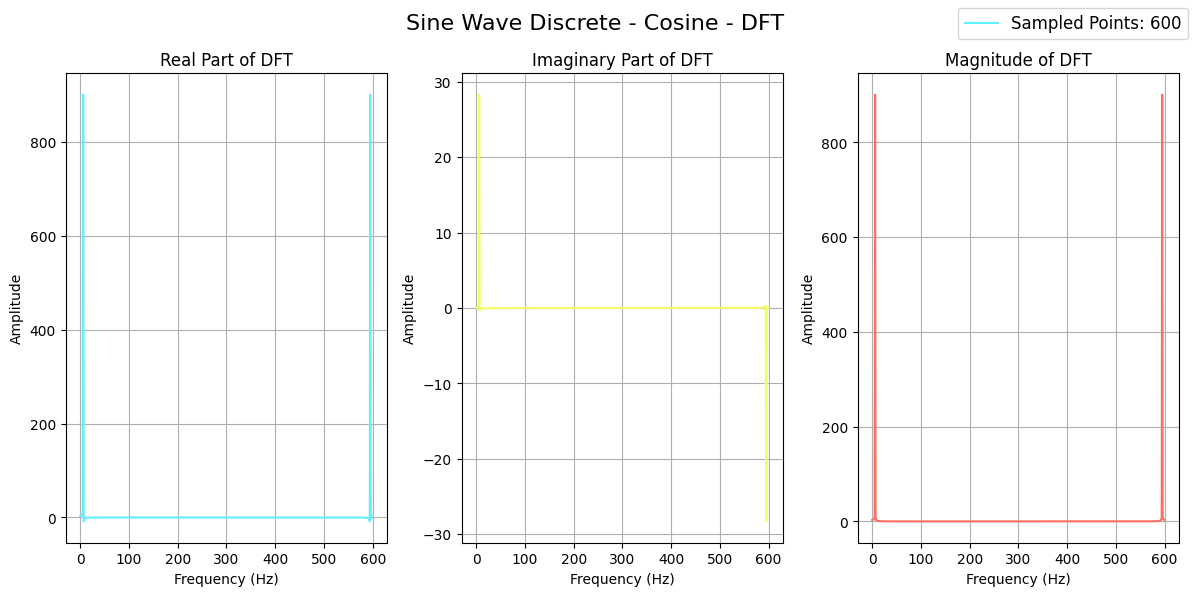

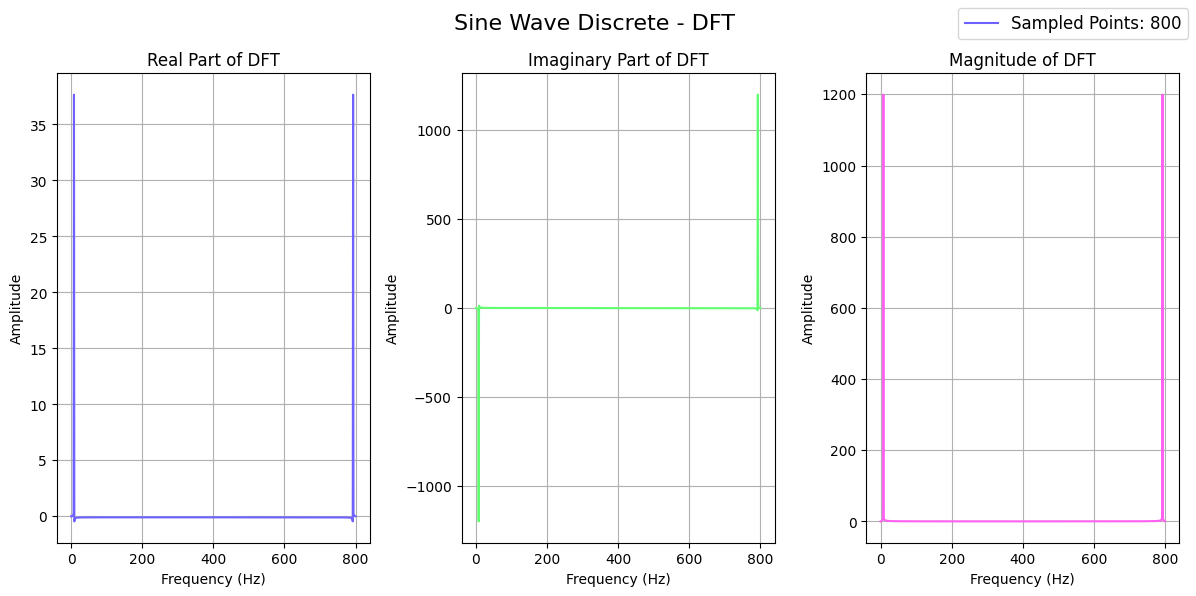

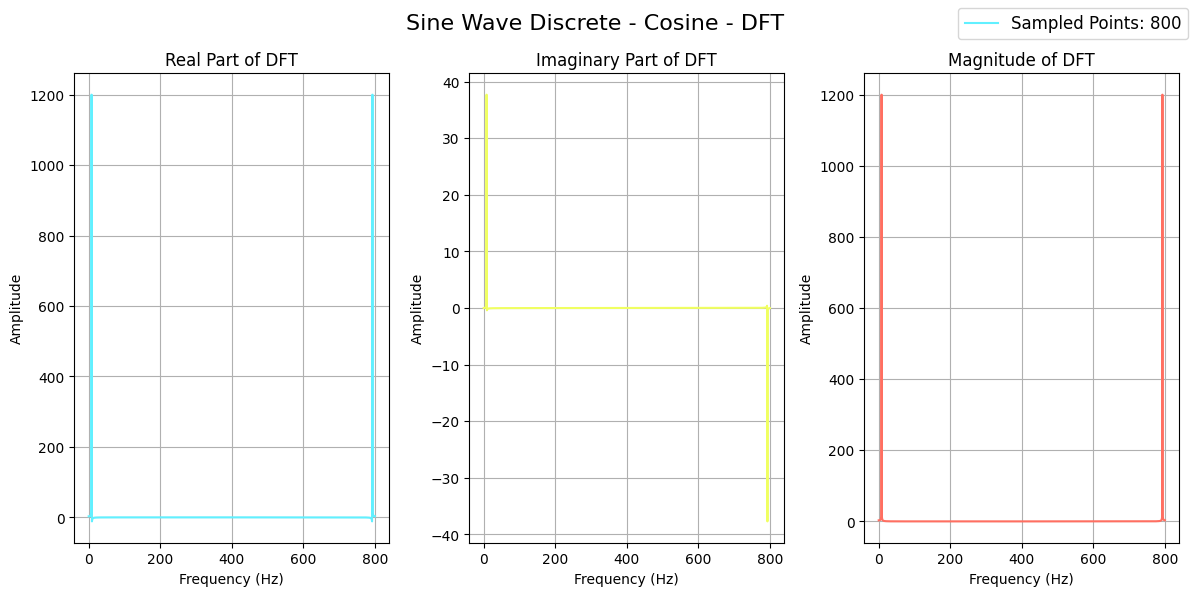

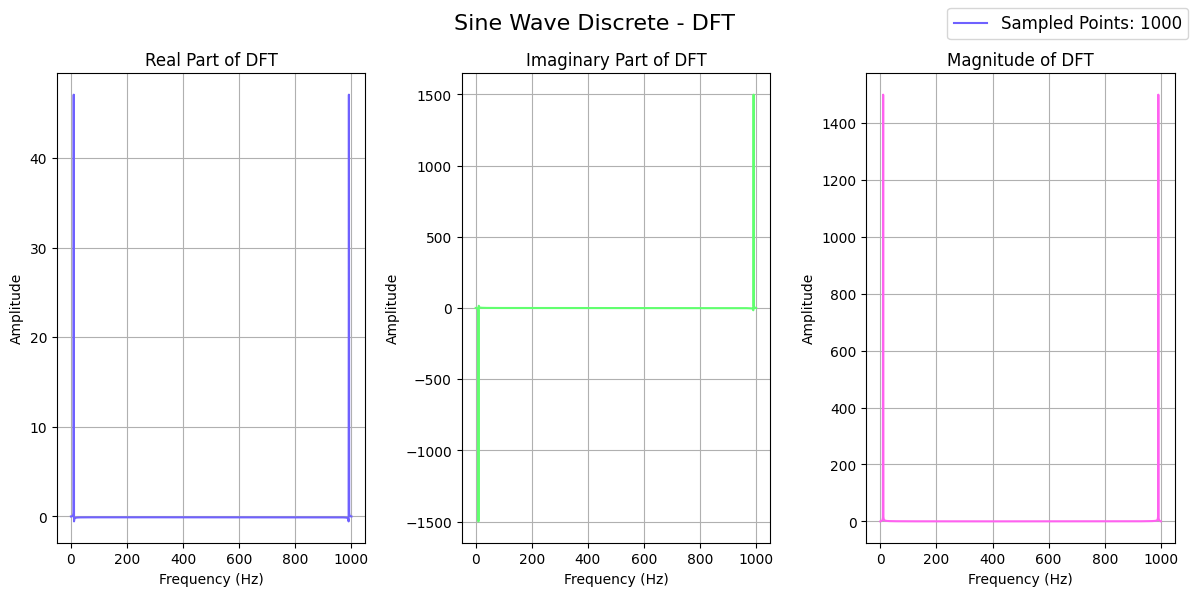

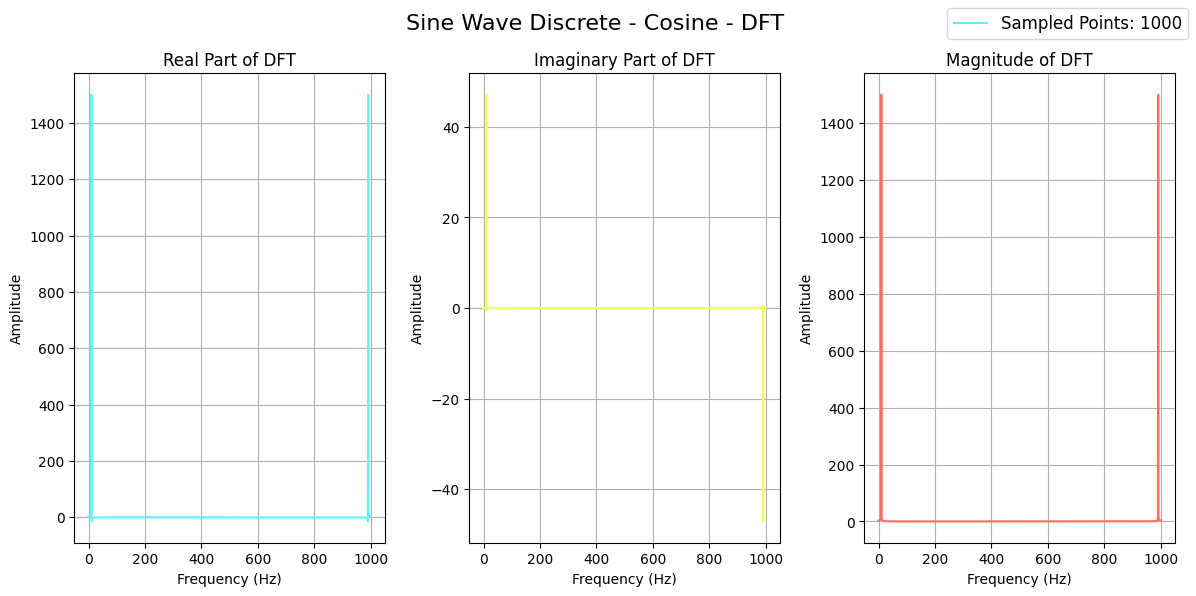

In [ ]:
T = 0.01

for N in range(200,1200, 200):
    n = np.linspace(0, N, N)
    t = n*T
    x = 3*np.sin(2*np.pi*t)
    plot_dft(x, 'Sine Wave Discrete')
    x = 3*np.cos(2*np.pi*t)
    plot_dft(x, 'Sine Wave Discrete - Cosine')
  


### 3.4.1.2 Zero-Padding

#### 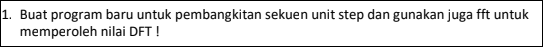

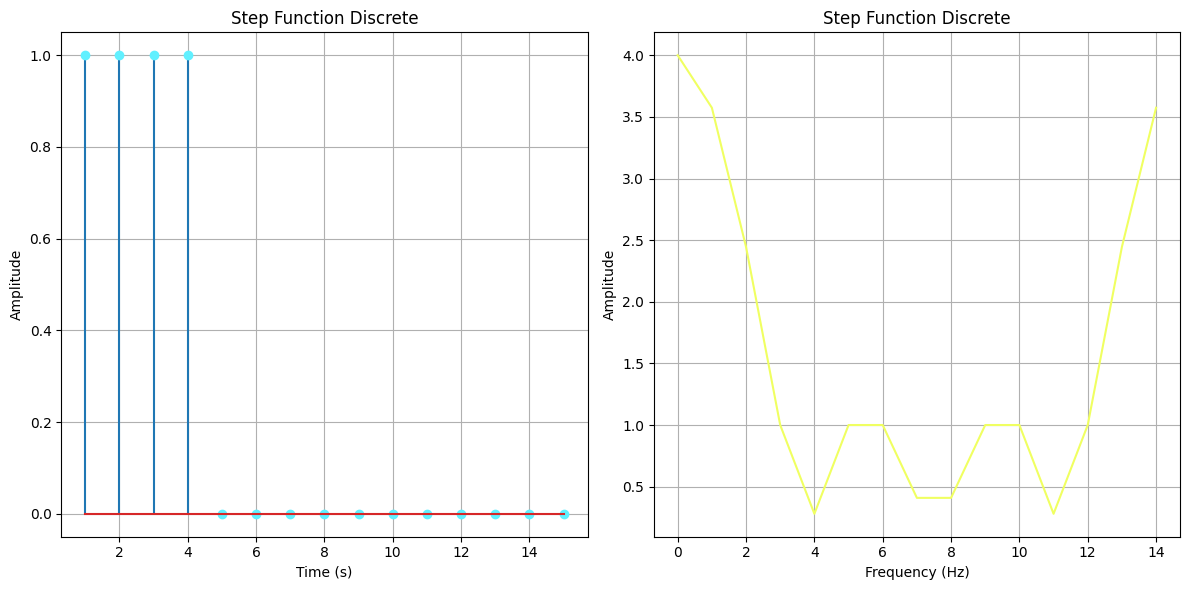

In [ ]:
x = np.array([])
for n in range(1, 16):
    if n <= 4:
        x = np.append(x, 1)
    else:
        x = np.append(x, 0)

t= np.arange(1, len(x)+1, 1)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

stemlines, markerlines, baselines = ax[0].stem(t, x)
stemlines.set_color(next(colors))
ax[0].set_title('Step Function Discrete')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

s = np.fft.fft(x)
spec = np.abs(s)
f_x = np.arange(0, len(spec), 1)
ax[1].plot(f_x, spec, color = next(colors))
ax[1].set_title('Step Function Discrete')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
plt.tight_layout()
plt.show()


#### 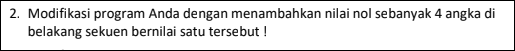

In [13]:
def xPaddedDft(x, pad, N):
    x_padded = np.pad(x, (pad, N), 'constant')
    t= np.arange(1, len(x_padded)+1, 1)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    stemlines, markerlines, baselines = ax[0].stem(t, x_padded)
    stemlines.set_color(next(colors))
    ax[0].set_title('Step Function Padded Discrete')
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Amplitude')
    ax[0].grid()

    s_padded = np.fft.fft(x_padded)
    spec_padded = np.abs(s_padded)
    f_x_padded = np.arange(0, len(spec_padded), 1)
    ax[1].plot(f_x_padded, spec_padded, color = next(colors))
    ax[1].set_title('Step Function Padded Discrete')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].grid()
    plt.tight_layout()
    plt.show()

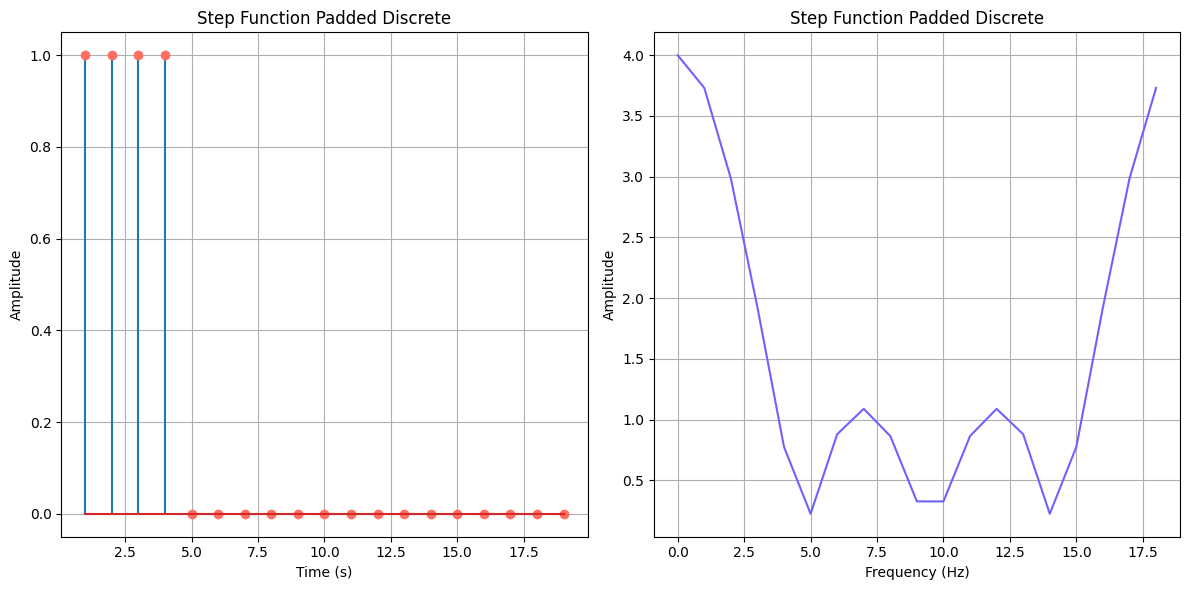

In [11]:
xPaddedDft(x, 0, 4)

#### 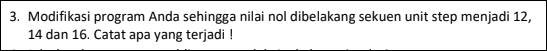

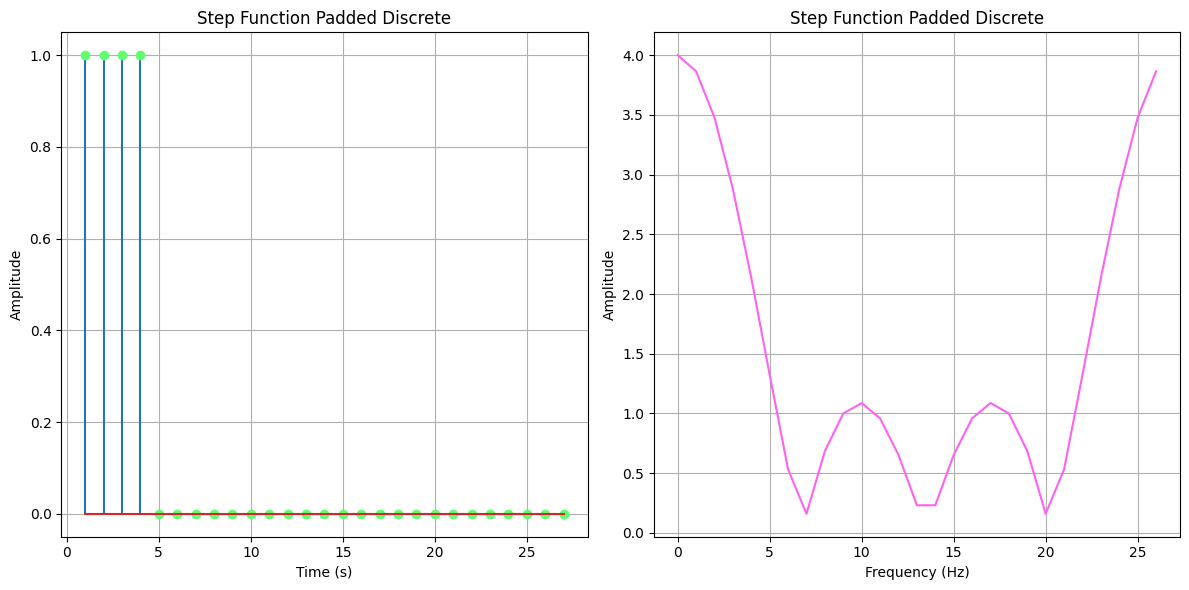

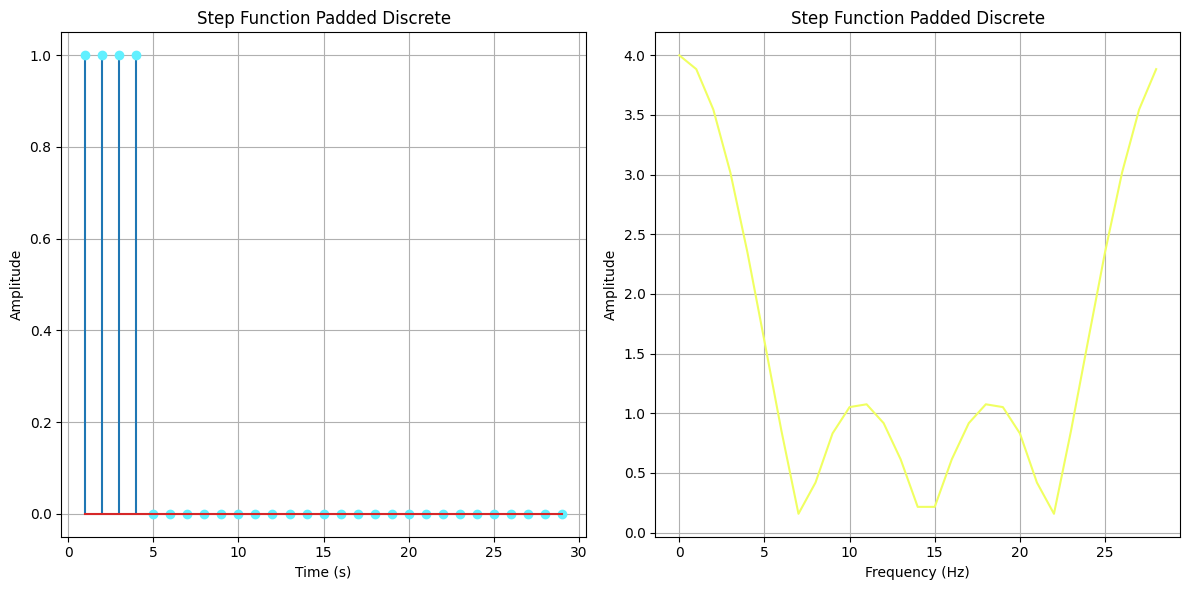

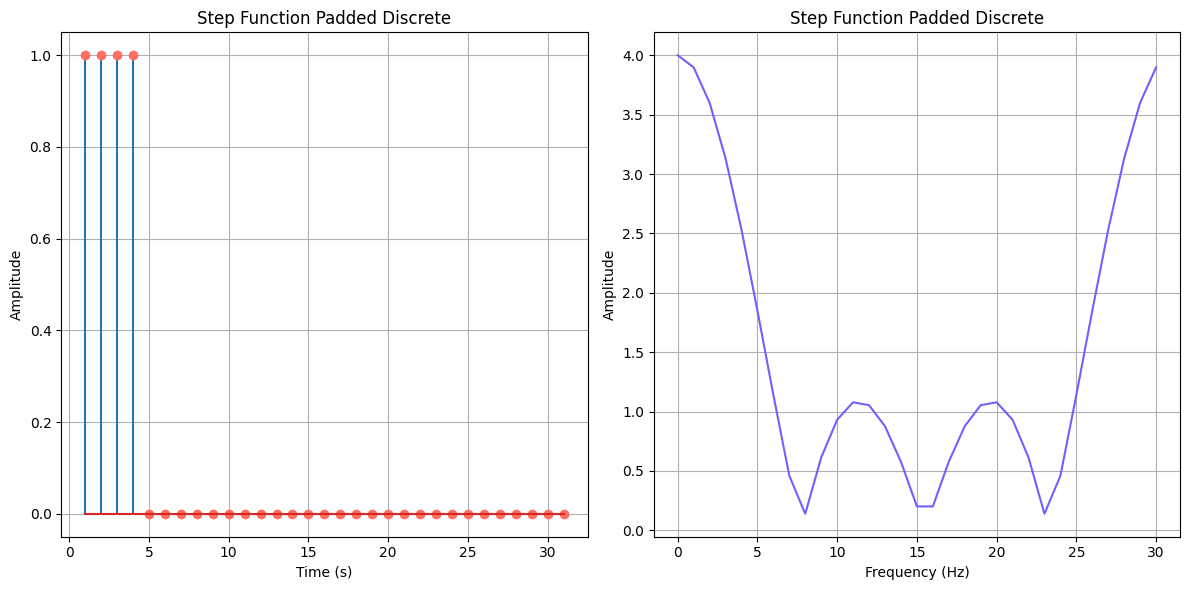

In [13]:
nPads = [12,14,16]
for pad in nPads:
    xPaddedDft(x, 0, pad)

### 3.4.1.3 Representasi Zero-Padding dalam Domain Frekuensi

#### 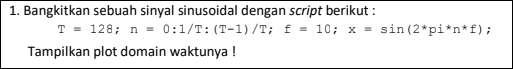

<StemContainer object of 3 artists>

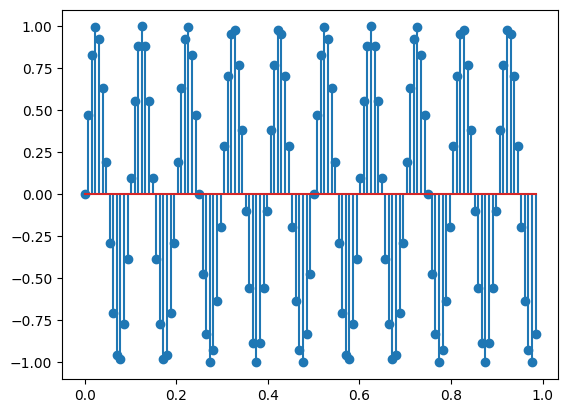

In [3]:
T = 128
n = np.arange(0, (T-1)/T, 1/T)
f = 10
x = np.sin(2*np.pi*n*f)
plt.stem(n,x)

#### 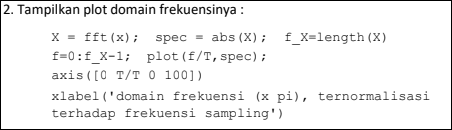

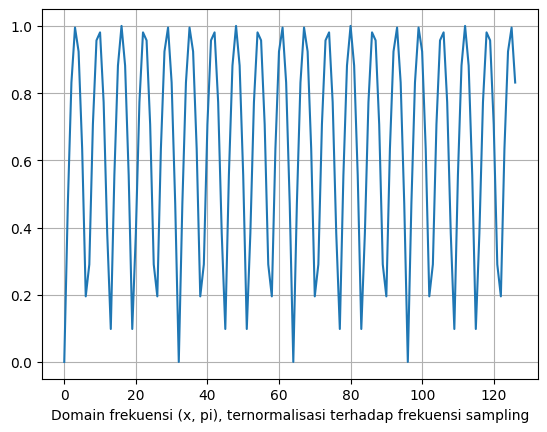

In [5]:
X = np.fft.fft(x)
spec = np.abs(x)
f_x = len(X)
f = np.arange(0,f_x)
plt.plot(f,spec)
plt.xlabel('Domain frekuensi (x, pi), ternormalisasi terhadap frekuensi sampling')
plt.grid()

#### 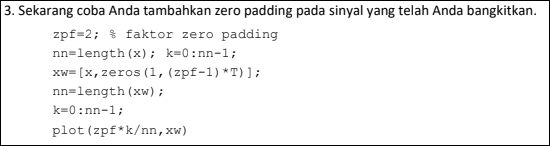

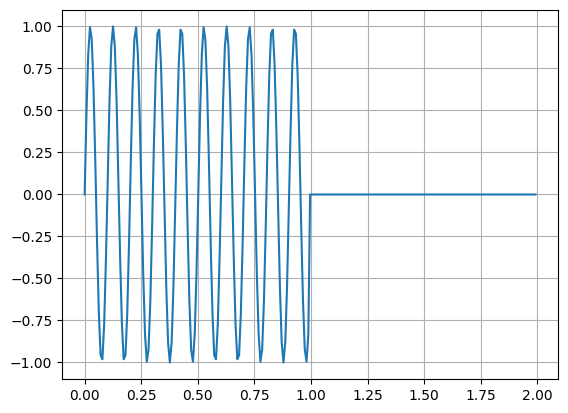

In [11]:
zpf  = 2;
nn = len(x)
t = np.linspace(0, nn, nn)
x_padded = np.pad(x, (0, (zpf-1)*T))
nn = len(x_padded)
k = np.arange(0,nn)
plt.plot((zpf*k)/nn, x_padded)
plt.grid()

#### 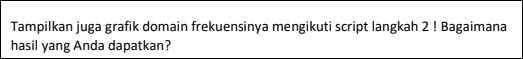

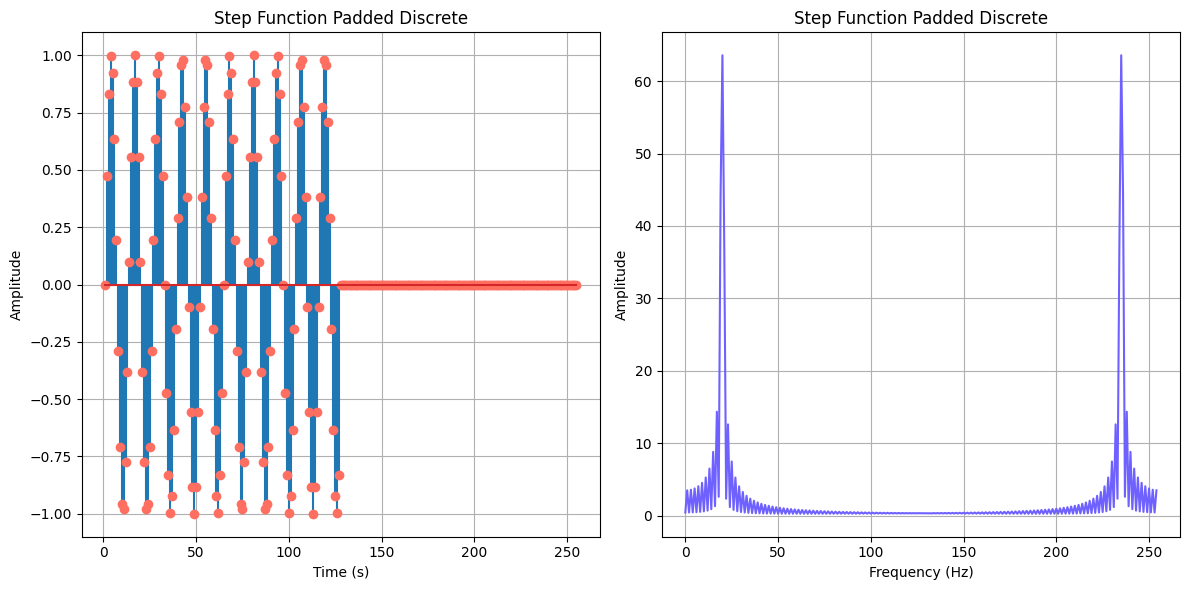

In [16]:
xPaddedDft(x, 0, (zpf-1)*T)

#### 

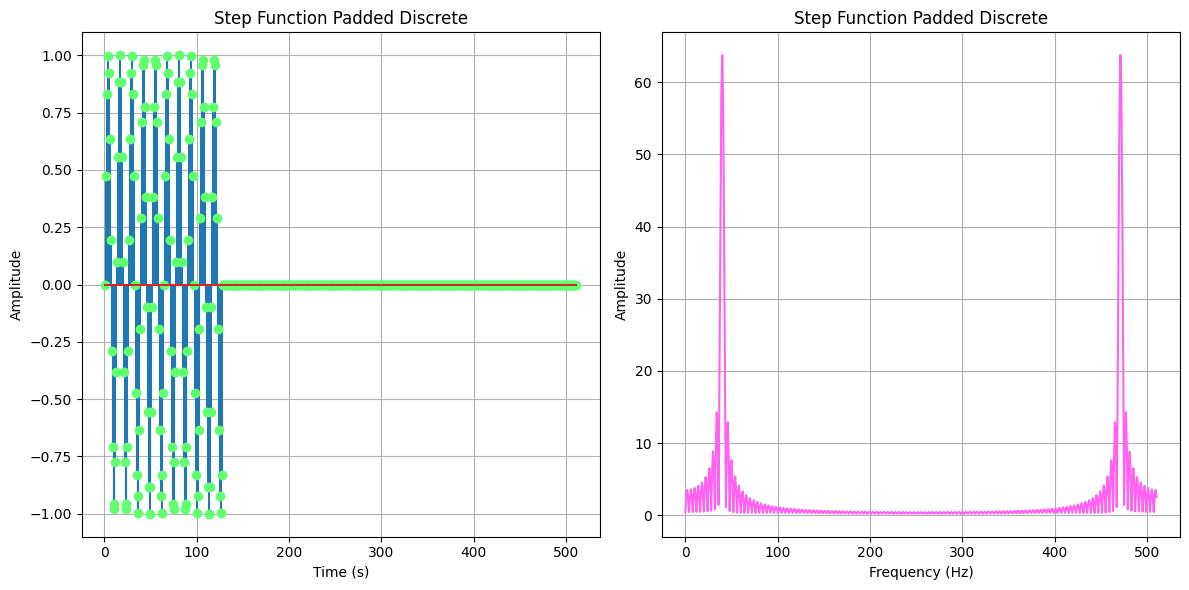

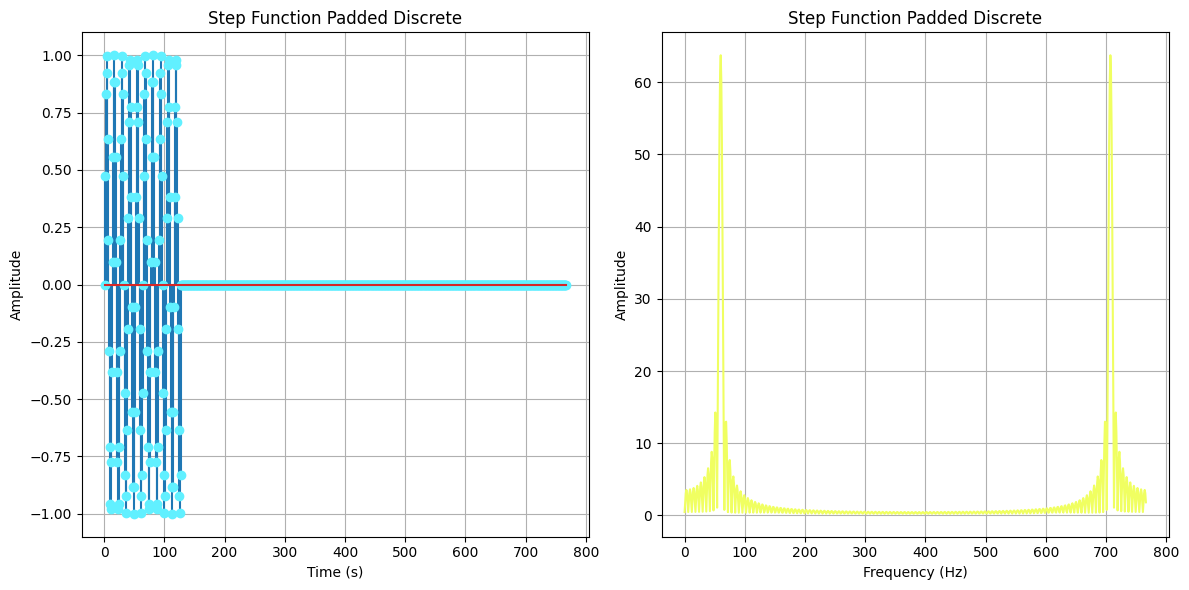

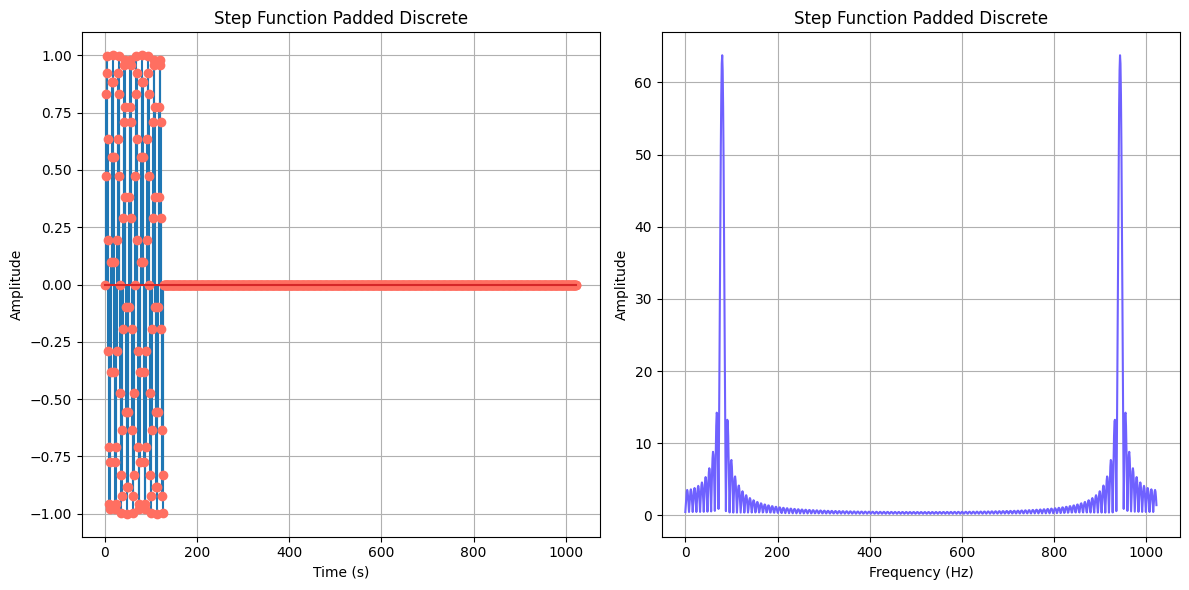

In [17]:
zpfs = [4,6,8]
for zpf in zpfs:
  xPaddedDft(x, 0, (zpf-1)*T)

### 3.4.1.4 Fenomena Gibbs

In [49]:
def lidiaCantik(N):
    t = np.arange(-3,3, 6/1000)
    c0 = 0.5
    w0 = np.pi
    xN = c0*np.ones(len(t))
    signal_point = f'Sampled Signal {N}'
    for n in range(1, N+1, 2):
        theta = (np.power(-1, (n - 1)/2) - 1) * np.pi / 2
        xN = xN + 2/n/np.pi*np.cos(n*w0*t + theta)

    fig, ax = plt.subplots()
    ax.plot(t, xN, color = 'pink')
    ax.set_title('Gibbs Phenomenon')
    ax.set_xlabel('Waktu (s)')
    ax.set_ylabel('x(t)')
    ax.legend([signal_point])
    ax.grid()
    plt.show()

#### 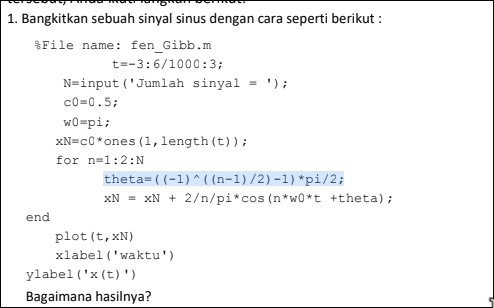

#### 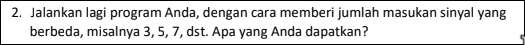

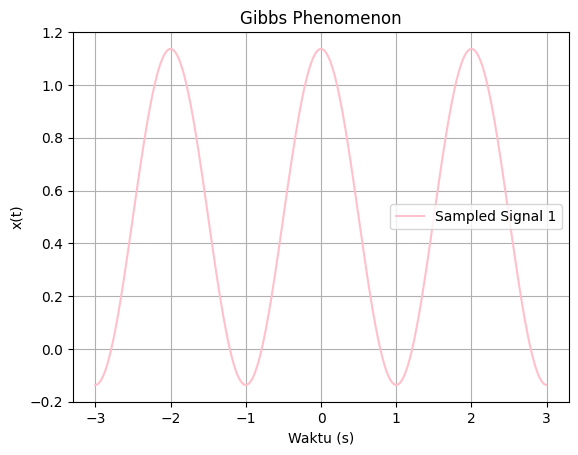

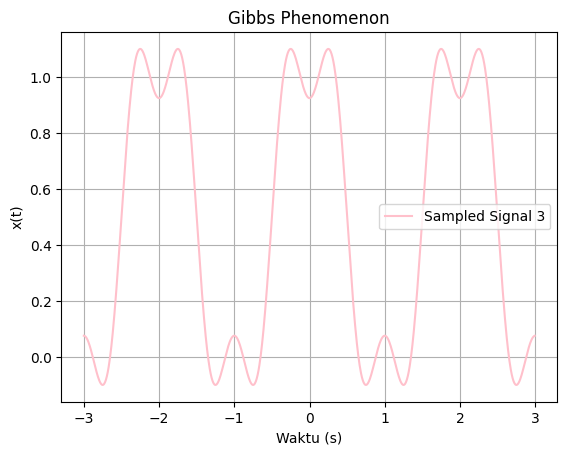

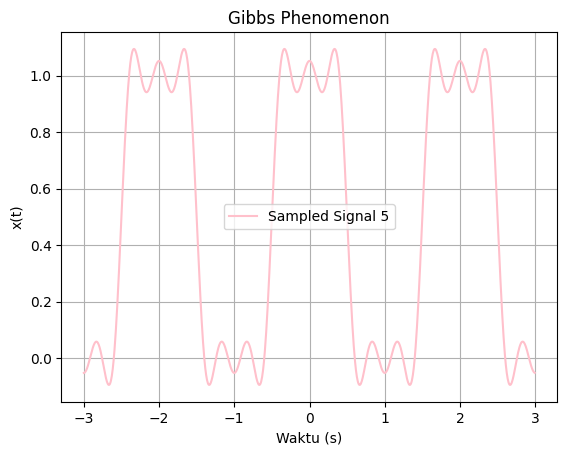

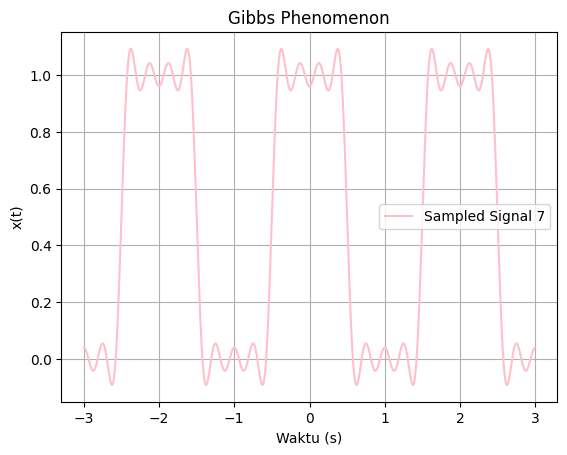

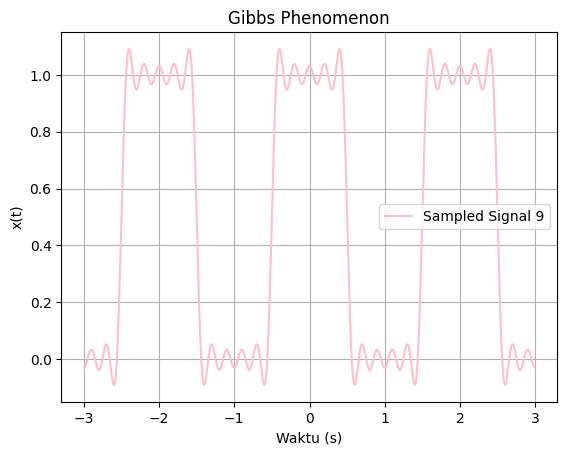

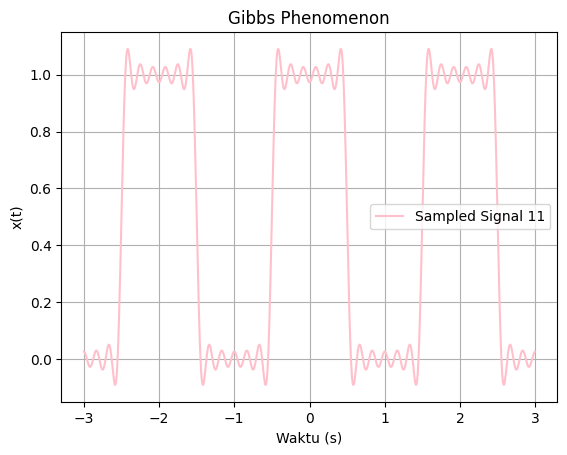

In [52]:
N = [1, 3, 5, 7, 9, 11]
for n in N:
    lidiaCantik(n)

### 3.4.1.5 Pengamatan Frekuensi Sinyal Sederhana

In [19]:
def fadhilSayangLidia(x, fs, n):
    S = np.fft.fft(x, n, norm='forward')
    w = np.fft.fftfreq(len(S), 1/fs)
    fig, ax = plt.subplots()
    fs_text = f'Sampling Frequency: {fs} Hz'
    amplitude_text = f'Amplitude: {np.max(x):.2f}'
    sampled_points_text = f'Sampled Points: {len(S)}'
    ax.plot(w, np.abs(S), color = next(colors))
    ax.plot(0,0, 'o', color = 'none')
    ax.plot(0,0, 'o', color = 'none')
    ax.set_title('FFT of Sine Wave')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.grid()
    ax.legend([fs_text, amplitude_text, sampled_points_text])
    plt.tight_layout()
    plt.show()


#### 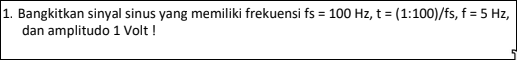

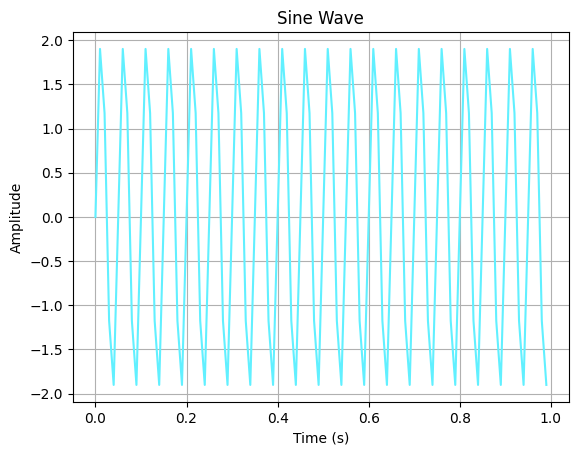

In [14]:
fs = 100
t = np.arange(0, 1, 1/fs)
f = 20
x = 2*np.sin(2*np.pi*f*t)
plt.plot(t, x, color = next(colors))
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

#### 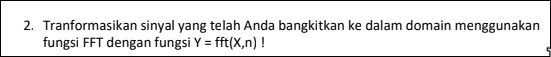

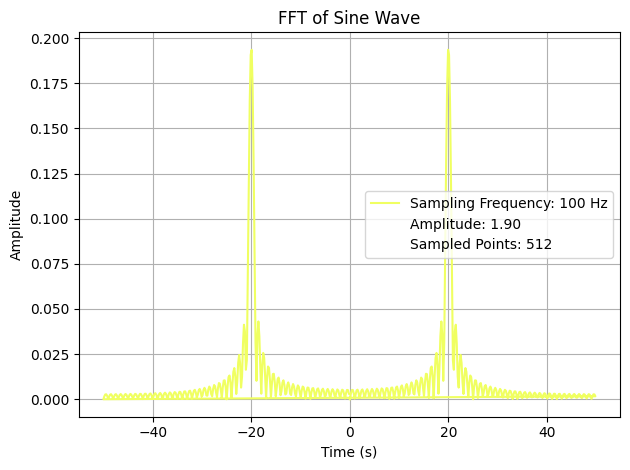

In [15]:
fadhilSayangLidia(x, fs, 512)

#### 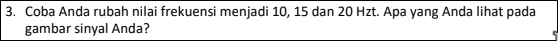

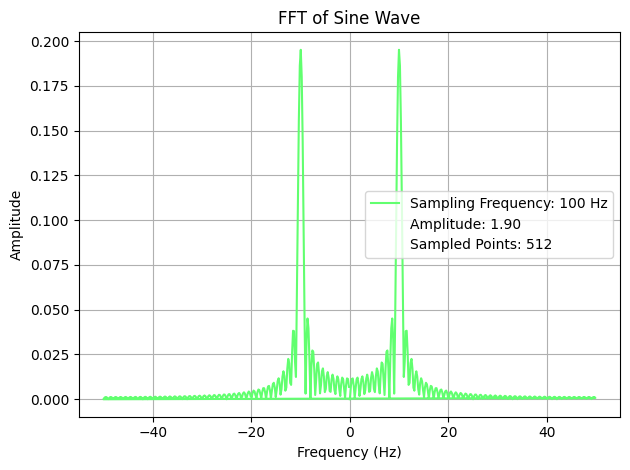

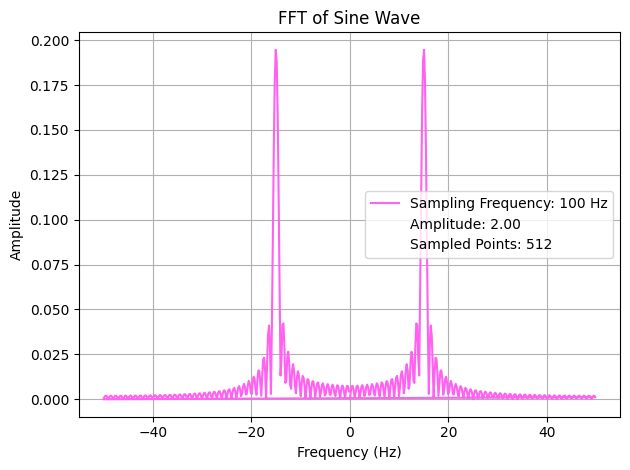

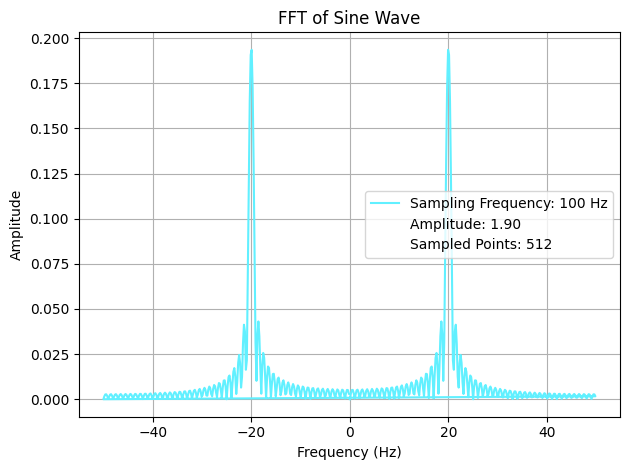

In [20]:
fs = 100
t = np.arange(0, 1, 1/fs)
freqs = [10, 15 , 20]
for freq in freqs:
    f = freq
    x = 2*np.sin(2*np.pi*f*t)
    fadhilSayangLidia(x, fs, 512)


#### 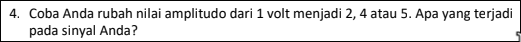

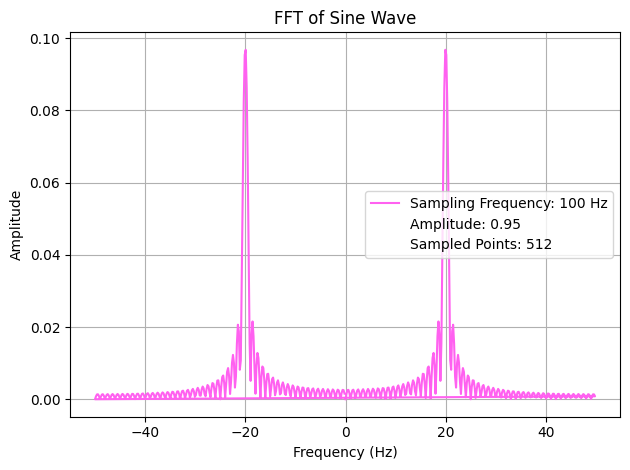

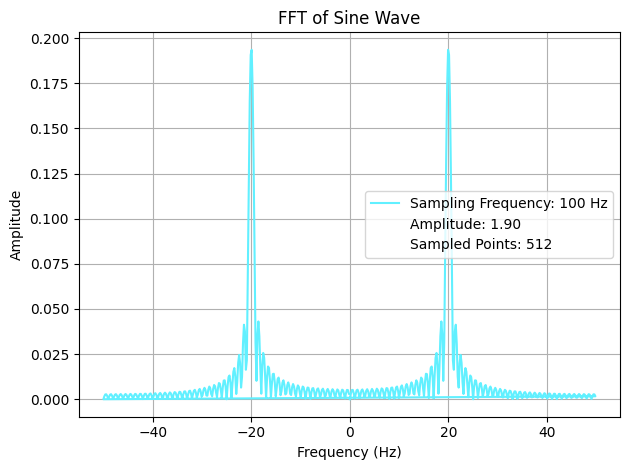

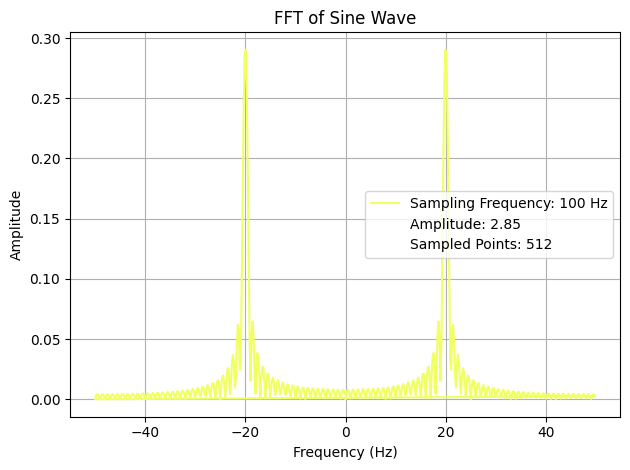

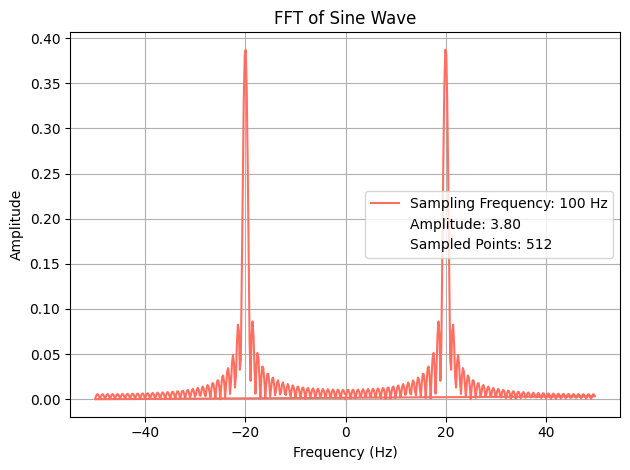

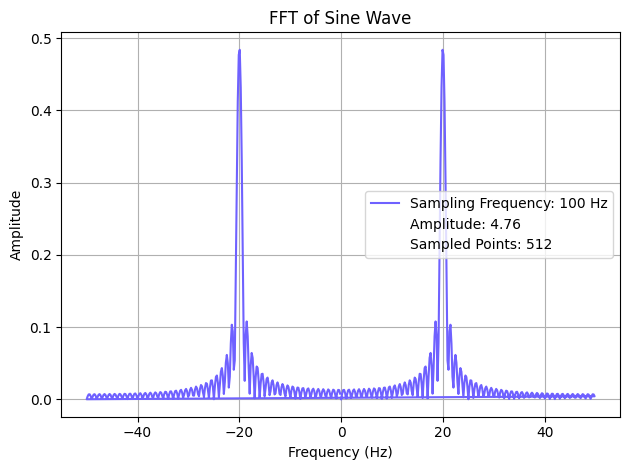

In [22]:
Amp = [1,2,3,4,5]
for amp in Amp:
    f = 20
    x = amp*np.sin(2*np.pi*f*t)
    fadhilSayangLidia(x, fs, 512)

#### 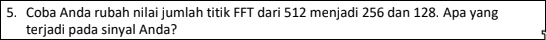

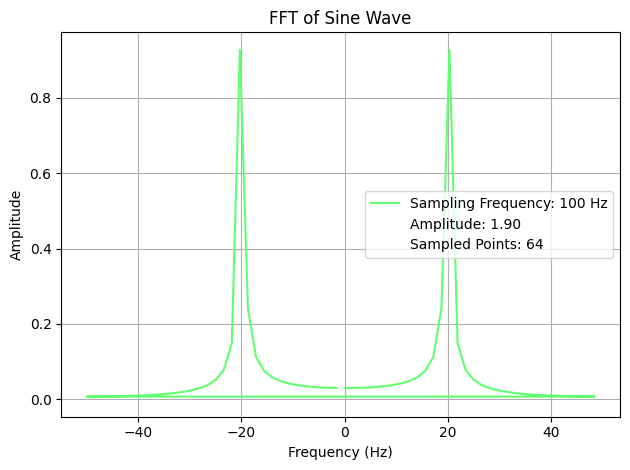

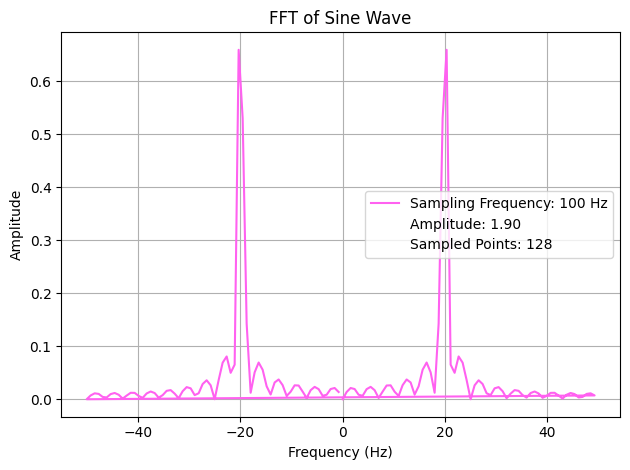

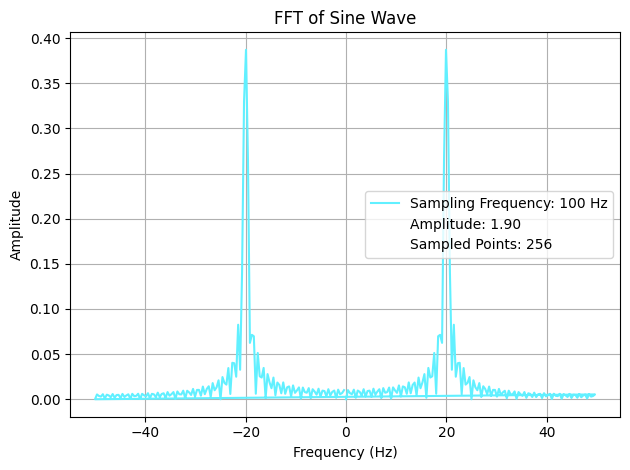

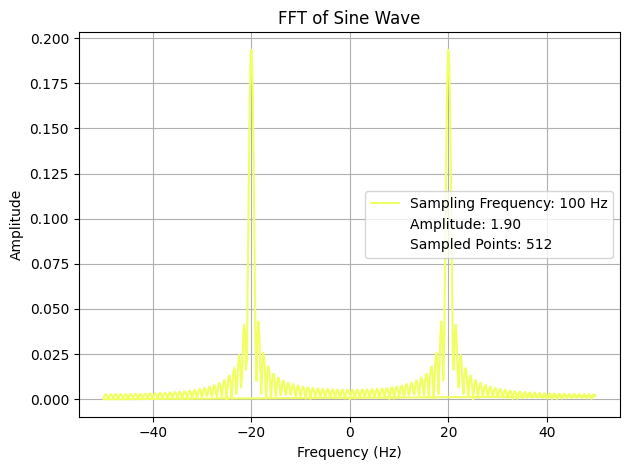

In [23]:
sampled_points = [64, 128, 256, 512]
for sp in sampled_points:
    f = 20
    x = 2*np.sin(2*np.pi*f*t)
    fadhilSayangLidia(x, fs, sp)

## 3.4.2 Spektrum Sinyal

### 3.4.2.1 Spektrum Amplitudo dan Spektrum Daya

#### 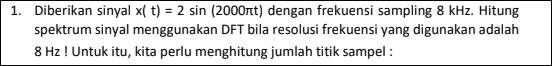

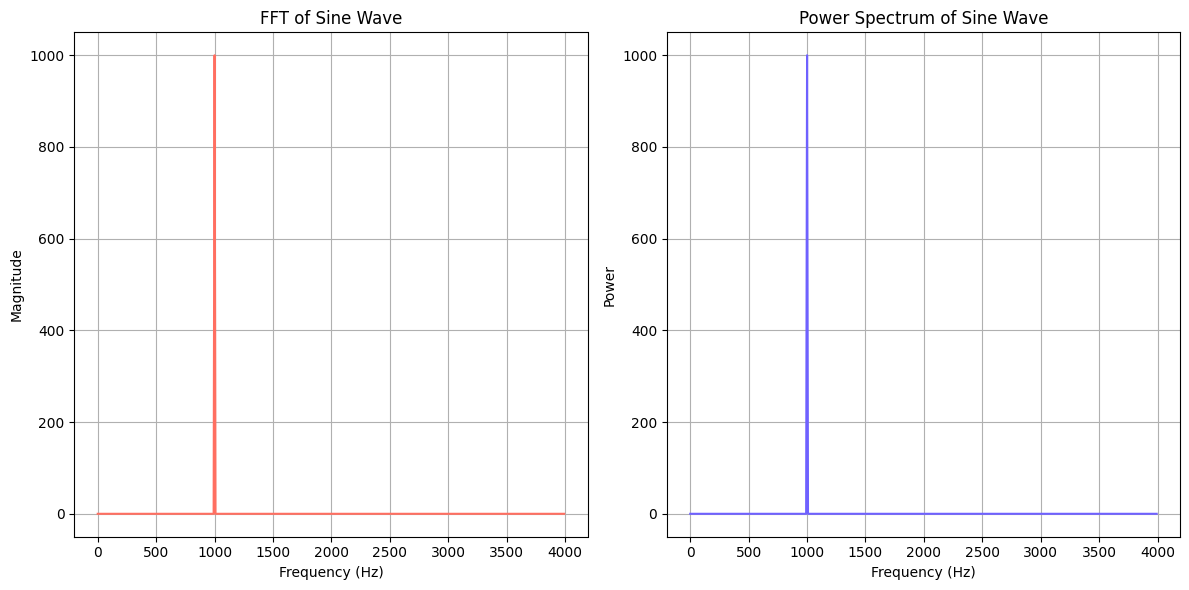

In [33]:
fs = 8000
f_signal = 1000
N = 1000

t = np.arange(0, N)/fs
x = 2*np.sin(2*np.pi*f_signal*t)

X = np.fft.fft(x)
f = np.fft.fftfreq(len(X), 1/fs)

X_mag = np.abs(X[:N//2])
freqs_pos = f[:N//2]

P = X*np.conj(X)/N
P_mag = np.abs(P[:N//2])
P_freqs_pos = f[:N//2]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(freqs_pos, X_mag, color = next(colors))
ax[0].set_title('FFT of Sine Wave')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
ax[1].plot(P_freqs_pos, P_mag, color = next(colors))
ax[1].set_title('Power Spectrum of Sine Wave')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power')
ax[1].grid()
plt.tight_layout()
plt.show()


### 3.4.2.2 Estimasi Spektrum Sinyal dengan Windowing

#### 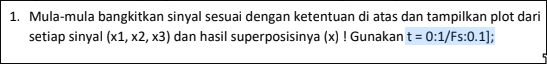

In [34]:
fs = 8000
t = np.arange(0, 0.1, 1/fs)
freq_signals = [500, 1200, 1800]
signal_phases = [0, np.pi/4, np.pi/2]
xs = []
for freq_signal, phase in zip(freq_signals, signal_phases):
    x = 2*np.sin(2*np.pi*freq_signal*t + phase)
    xs.append(x)

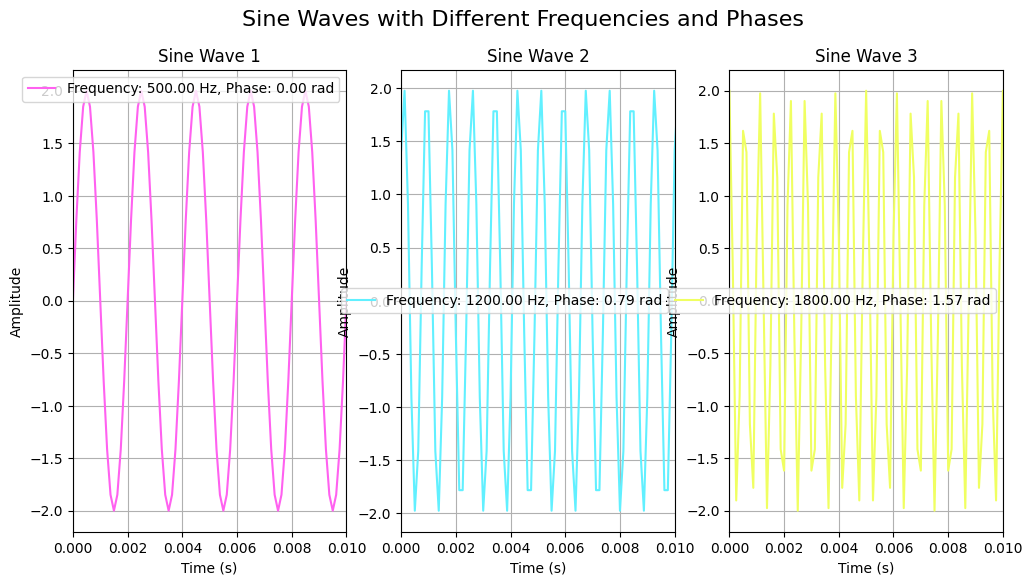

In [42]:
fig, ax = plt.subplots(1, len(xs), figsize=(12, 6))
fig.suptitle('Sine Waves with Different Frequencies and Phases', fontsize=16)
fig.set_size_inches(12, 6)
for i, x in enumerate(xs):
    ax[i].plot(t, x, color = next(colors))
    ax[i].set_title(f'Sine Wave {i+1}')
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')
    ax[i].grid()
    ax[i].legend([f'Frequency: {freq_signals[i]:.2f} Hz, Phase: {signal_phases[i]:.2f} rad'])
    ax[i].set_xlim(0, 0.01)

plt.show()

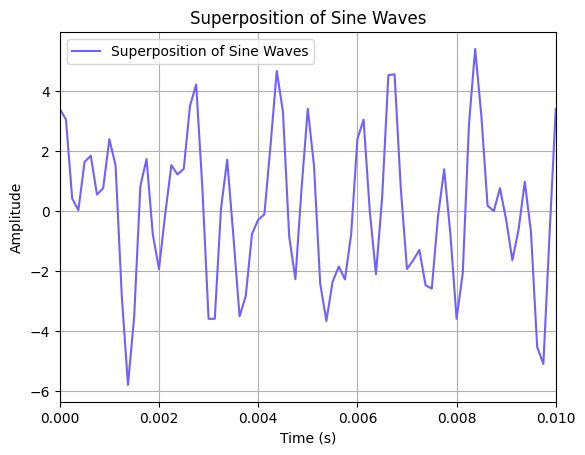

In [44]:
supperPosition = np.sum(xs, axis=0)
fig, ax = plt.subplots()
ax.plot(t, supperPosition, color = next(colors))
ax.set_title('Superposition of Sine Waves')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()
ax.legend([f'Superposition of Sine Waves'])
ax.set_xlim(0, 0.01)
plt.show()


#### 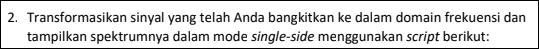

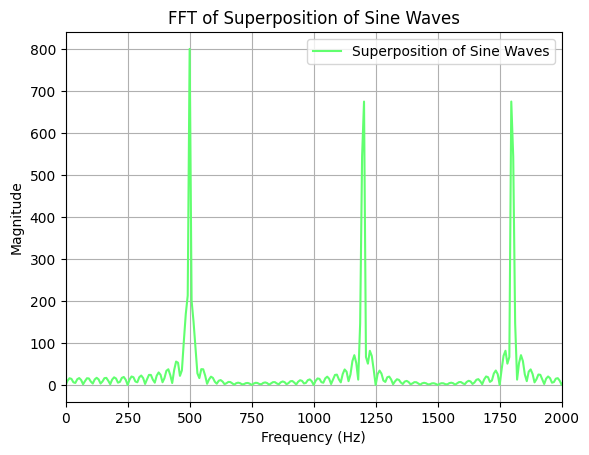

In [46]:
L = len(supperPosition)
NFFT = np.pow(2, int(np.ceil(np.log2(L))))
X = np.fft.fft(supperPosition, NFFT)
f = np.fft.fftfreq(len(X), 1/fs)
X_mag = np.abs(X[:L//2])
freqs_pos = f[:L//2]
fig, ax = plt.subplots()
ax.plot(freqs_pos, X_mag, color = next(colors))
ax.set_title('FFT of Superposition of Sine Waves')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.grid()
ax.legend([f'Superposition of Sine Waves'])
ax.set_xlim(0, 2000)
plt.show()

#### 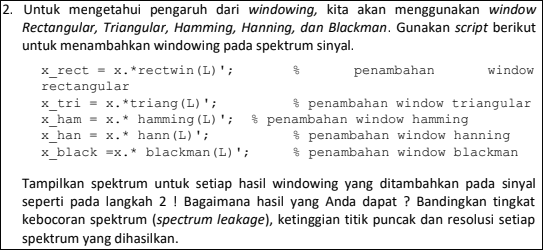

In [53]:
def triangular_window(N):
    if N % 2 == 0:
        # Even length
        n = np.arange(0, N)
        window = 1 - np.abs((n - (N - 1) / 2) / (N / 2))
    else:
        # Odd length
        n = np.arange(0, N)
        window = 1 - np.abs((n - (N - 1) / 2) / ((N + 1) / 2))
    return window

In [66]:
windows = {
    'Rectangular': np.ones(L),
    'Hamming': np.hamming(L),
    'Hanning': np.hanning(L),
    'Blackman': np.blackman(L),
    'Triangular': triangular_window(L)
}

window_colors = {
    'Rectangular': 'blue',
    'Hamming': 'orange',
    'Hanning': 'green',
    'Blackman': 'red',
    'Triangular': 'purple'
}

#### 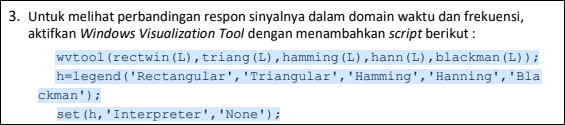

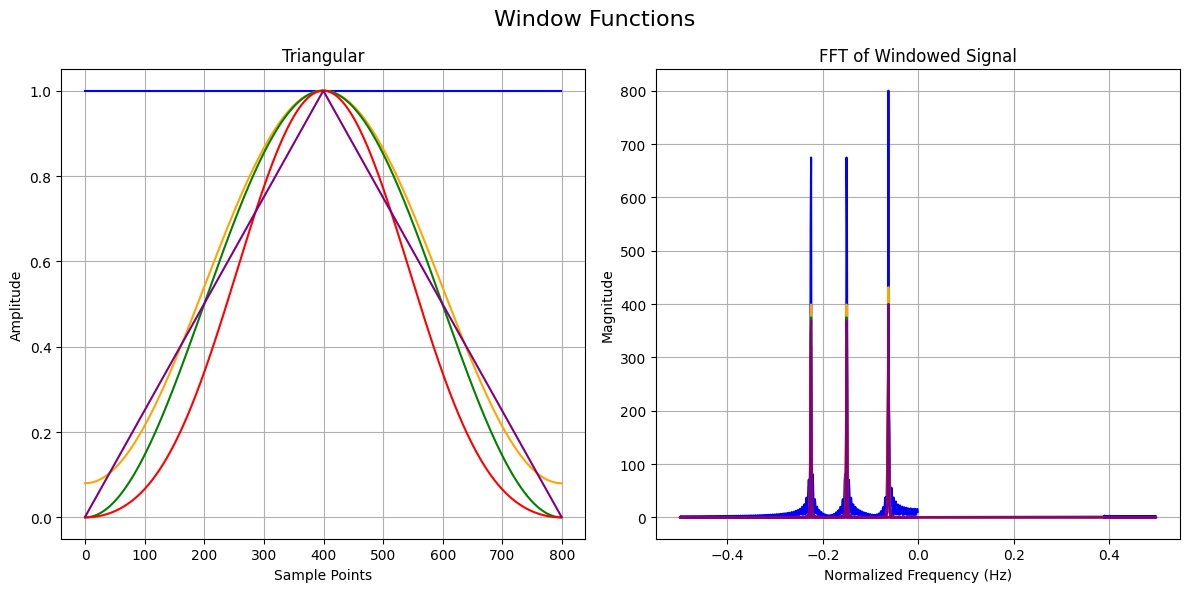

In [80]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle('Window Functions', fontsize=16)
axs = axs.flatten()
for  i, ((name, window), color) in enumerate(zip(windows.items(), window_colors.values())):
    axs[0].plot(window, color = color)
    axs[0].set_title(name)
    axs[0].set_xlabel('Sample Points')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid()
    X_windowed = np.fft.fft(supperPosition * window, NFFT)
    f_windowed = np.fft.fftfreq(len(X_windowed), 1/fs)
    X_mag_windowed = np.abs(X_windowed[L//2:])
    freqs_pos_windowed = f_windowed[L//2:]/fs
    axs[1].plot(freqs_pos_windowed, X_mag_windowed, color = color)
    axs[1].set_title('FFT of Windowed Signal')
    axs[1].set_xlabel('Normalized Frequency (Hz)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid()
plt.tight_layout()
plt.show()

### 3.4.3 Aplikasi Algoritma FFT pada Sinyal Audio

#### 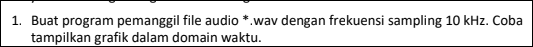

In [83]:
audio, sr = lr.load('./audio.mp3', sr=10000)

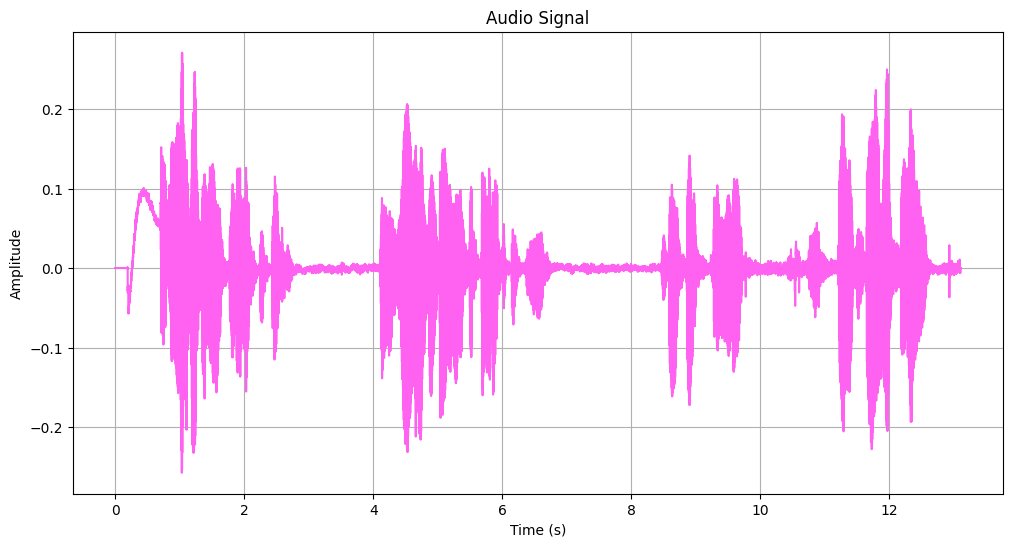

In [88]:
t = np.arange(0, len(audio)) / sr
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(t, audio, color = next(colors))
ax.set_title('Audio Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

#### 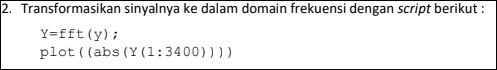

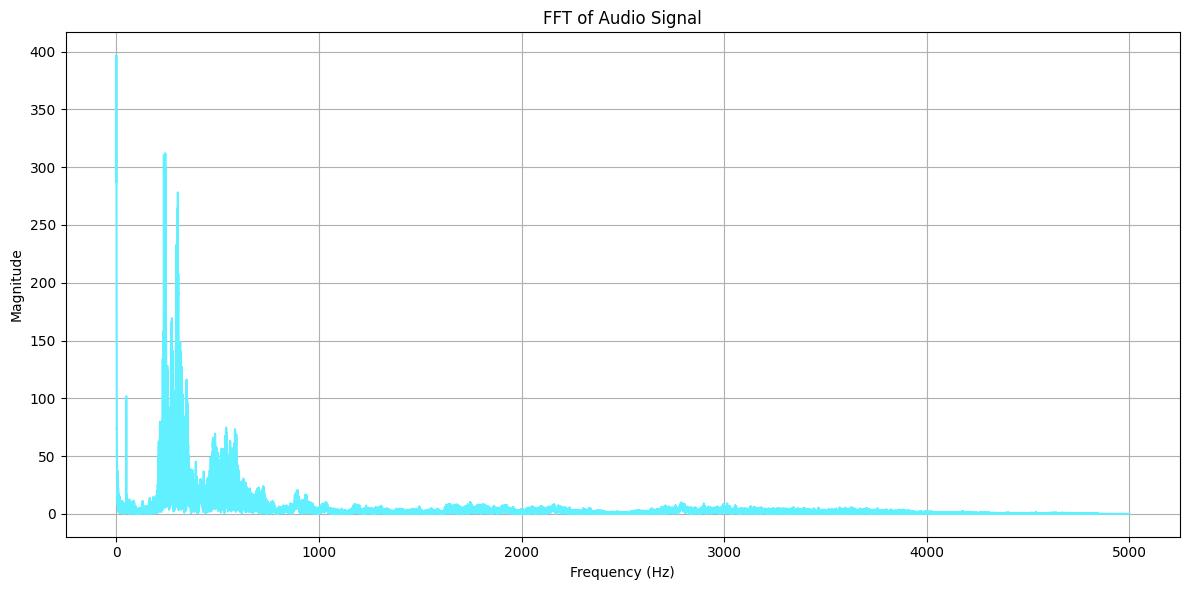

In [89]:
audio_fft = np.fft.fft(audio)
f_audio = np.fft.fftfreq(len(audio_fft), 1/sr)
audio_mag = np.abs(audio_fft[:len(audio)//2])
freqs_pos_audio = f_audio[:len(audio)//2]
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(freqs_pos_audio, audio_mag, color = next(colors))
ax.set_title('FFT of Audio Signal')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.grid()
plt.tight_layout()
plt.show()


#### 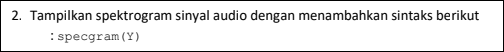

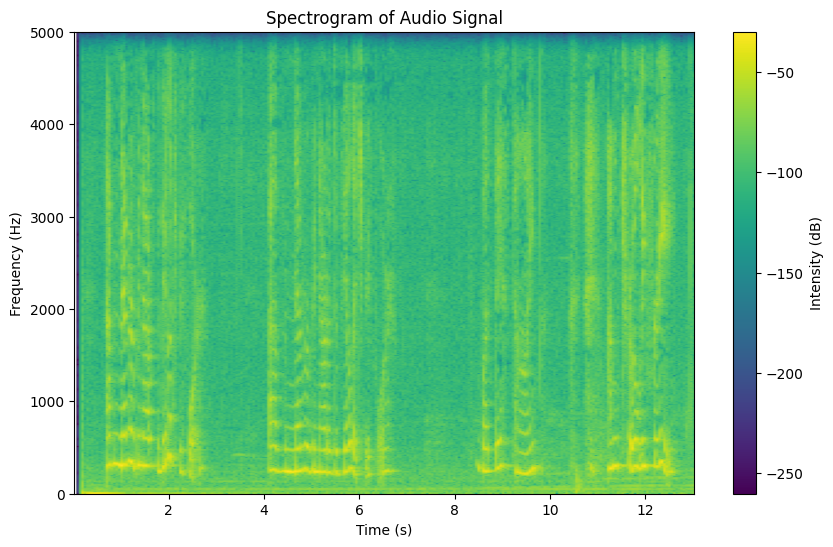

In [95]:
plt.figure(figsize=(10, 6))
plt.specgram(audio, Fs=sr, NFFT=1024, noverlap=512)
plt.title('Spectrogram of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.show()


In [96]:
ipd.Audio(audio, rate=sr)